# Library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")


# Data

In [5]:
car_models = ['audi', 'bmw', 'cclass', 'focus', 'ford', 'hyundi', 'merc', 'skoda', 'toyota', 'vauxhall', 'vw']
df = pd.DataFrame()

for i in car_models:
    carmodel_df = pd.read_csv('dataset/'+i+'.csv')
    if i == 'hyundi':
        carmodel_df = carmodel_df.rename(columns={'tax(£)': 'tax'})

    df = pd.concat([df, carmodel_df])
    

In [6]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0


# EDA

## Distribusi Data

In [7]:
num_features=list(df.dtypes[df.dtypes!=object].index)
num_features.remove('year')
num_features

['price', 'mileage', 'tax', 'mpg', 'engineSize']

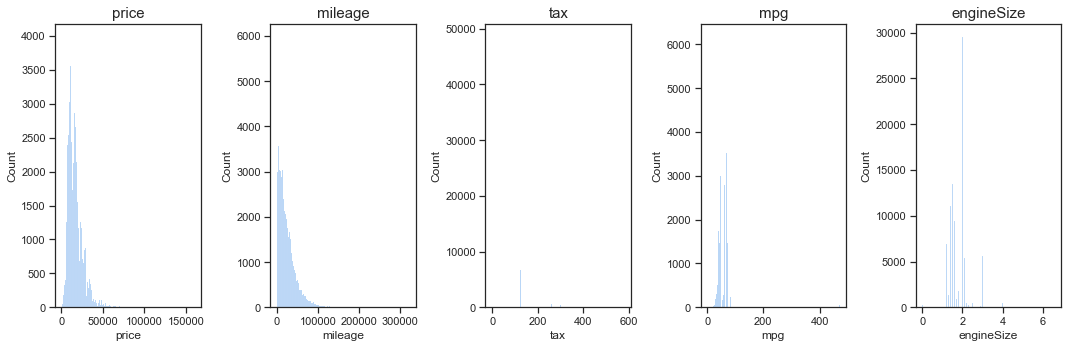

In [10]:
figure, axis = plt.subplots(1,5,figsize=(15,5))

for i in range(len(num_features)):
    axis[i].set_title(num_features[i], size=15)
    sns.histplot(ax=axis[i], data = df, x=num_features[i])

# auto padding subplot
plt.tight_layout()
plt.show()

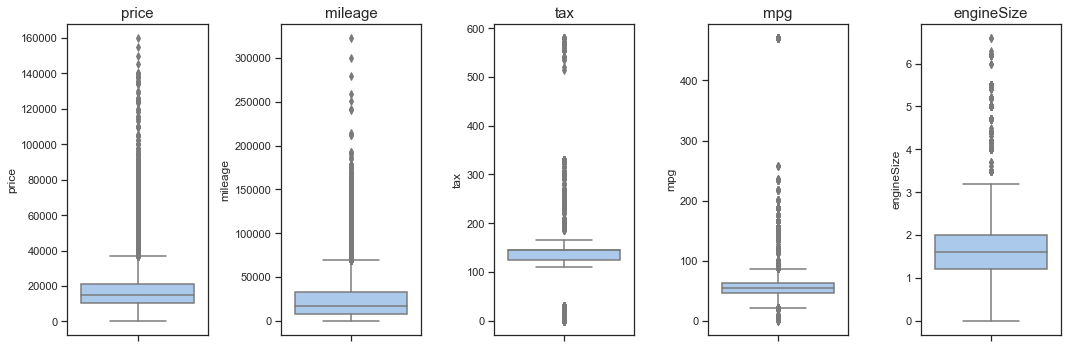

In [88]:
figure, axis = plt.subplots(1,5,figsize=(15,5))

for i in range(len(num_features)):
    axis[i].set_title(num_features[i], size=15)
    sns.boxplot(ax=axis[i], data = df, y=num_features[i])

# auto padding subplot
plt.tight_layout()
plt.show()

* berdasarkan histplot, sebaran data kelima feature cenderung *right-skew*.
* berdasarkan boxplot, sebaran data kelima feature memiliki banyak outlier di sebalah kanan.
* dapat disimpulkan persebaran data kelima data numerik tsb memiliki distribusi tidak normal.

## Correlation

In [92]:
df[num_features].corr(method='spearman')

,price,mileage,tax,mpg,engineSize
price,1.000000,-0.533232,0.338215,-0.429363,0.570025
mileage,-0.533232,1.000000,-0.274635,0.358522,0.099104
tax,0.338215,-0.274635,1.000000,-0.581394,0.173881
mpg,-0.429363,0.358522,-0.581394,1.000000,-0.214932
engineSize,0.570025,0.099104,0.173881,-0.214932,1.000000


## Missing Value

In [29]:
full_data.isna().sum() / full_data.shape[0] * 100

model           0.0000
year            0.0000
price           0.0000
transmission    0.0000
mileage         0.0000
fuelType        0.0000
tax             8.6171
mpg             8.6171
engineSize      0.0000
dtype: float64

### Handling Missing Value in Tax

In [ ]:
https://www.gov.uk/calculate-tax-rates-for-new-cars

berdasarkan referensi diatas, untuk perhitungan 


pending